In [17]:
%matplotlib notebook

import random
import time

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Summary of Riddler Express

A class of 30 children is playing a game where they all stand in a circle along with their teacher. The teacher is holding two things: a coin and a potato. The game progresses like this: The teacher tosses the coin. Whoever holds the potato passes it to the left if the coin comes up heads and to the right if the coin comes up tails. The game ends when every child except one has held the potato, and the one who hasn’t is declared the winner.

How do a child’s chances of winning change depending on where they are in the circle? In other words, what is each child’s win probability?

## computational solution

let's just do some simulations and see what we get

In [52]:
HEADS = 0
TAILS = 1

class HotPotatoGame(object):
    def __init__(self, n=30, visualize=False):
        self.n = n
        self.visualize = visualize
    
    def take_step(self):
        coin = random.randint(0, 1)
        if coin == HEADS:
            self.potatoindex -= 1
        else:
            self.potatoindex += 1
        self.potatoindex %= self.n
        self.hadpotato[self.potatoindex] += 1
        self.history.append(self.potatoindex)
        if self.visualize:
            self.draw_hist()
            
    def draw_hist(self):
        self.axbar.clear()
        self.axhistory.clear()
        sns.barplot(x=list(range(self.n)), y=self.hadpotato, ax=self.axbar)
        sns.pointplot(x=list(range(len(self.history))), y=self.history, ax=self.axhistory)
        self.f.canvas.draw()
    
    @property
    def havenots(self):
        return [i for (i, elem) in enumerate(self.hadpotato) if elem == 0]
    
    @property
    def loser(self):
        havenots = self.havenots
        if len(havenots) == 1:
            return havenots[0]
        else:
            return None
    
    def init(self):
        self.hadpotato = [0 for student in range(self.n)]
        self.potatoindex = 0
        self.hadpotato[0] = 1
        self.history = [0]
        if self.visualize:
            self.f, (self.axbar, self.axhistory) = plt.subplots(2, 1)
    
    def run_simulation(self):
        self.init()
        while self.loser is None:
            self.take_step()
        return self.loser

In [53]:
hpg = HotPotatoGame(visualize=True)

<IPython.core.display.Javascript object>


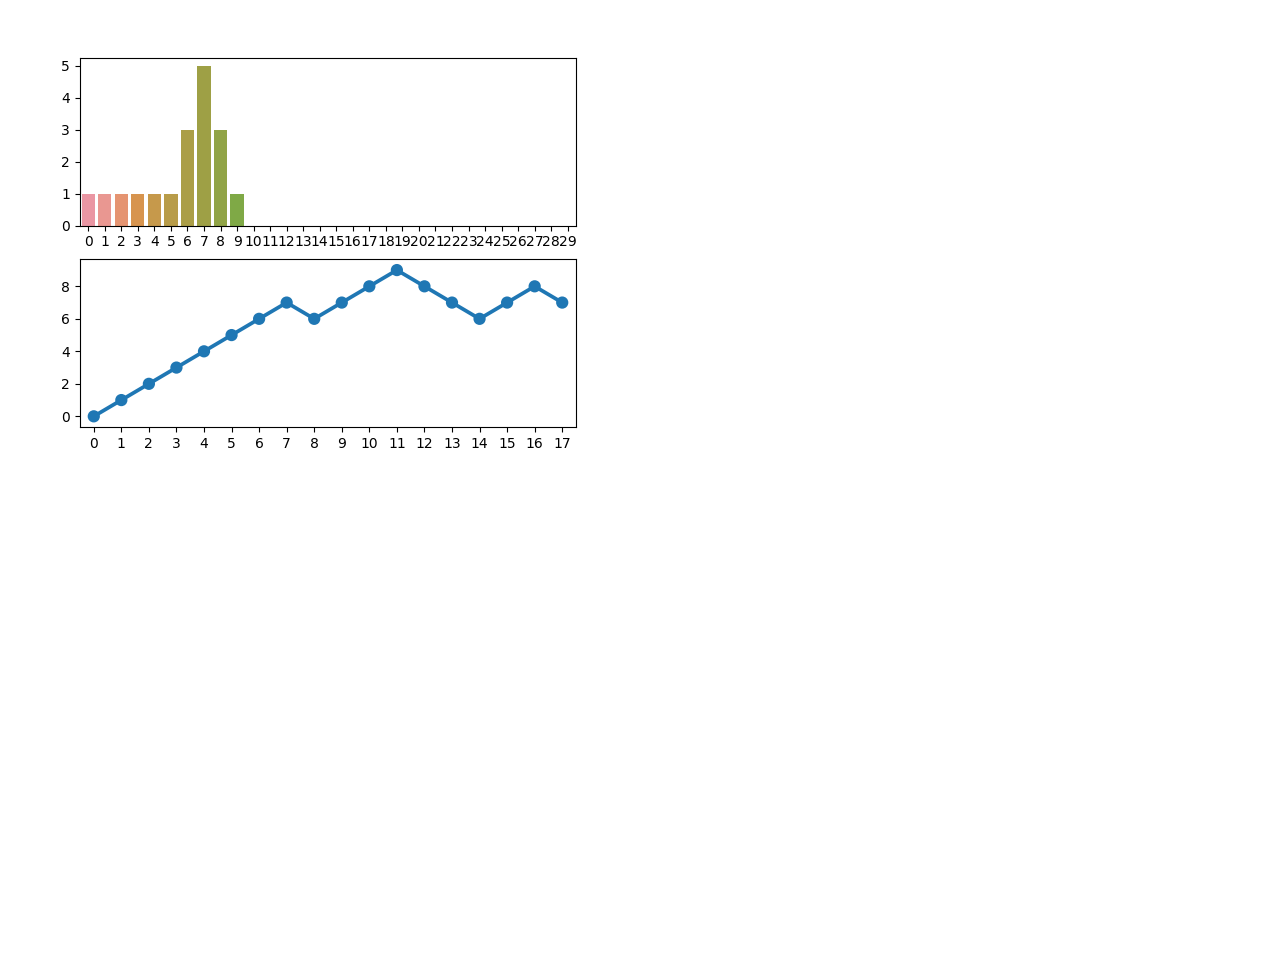

KeyboardInterrupt: 

In [54]:
hpg.run_simulation()

In [55]:
hpg = HotPotatoGame()

In [56]:
hpg.run_simulation()

17

<IPython.core.display.Javascript object>


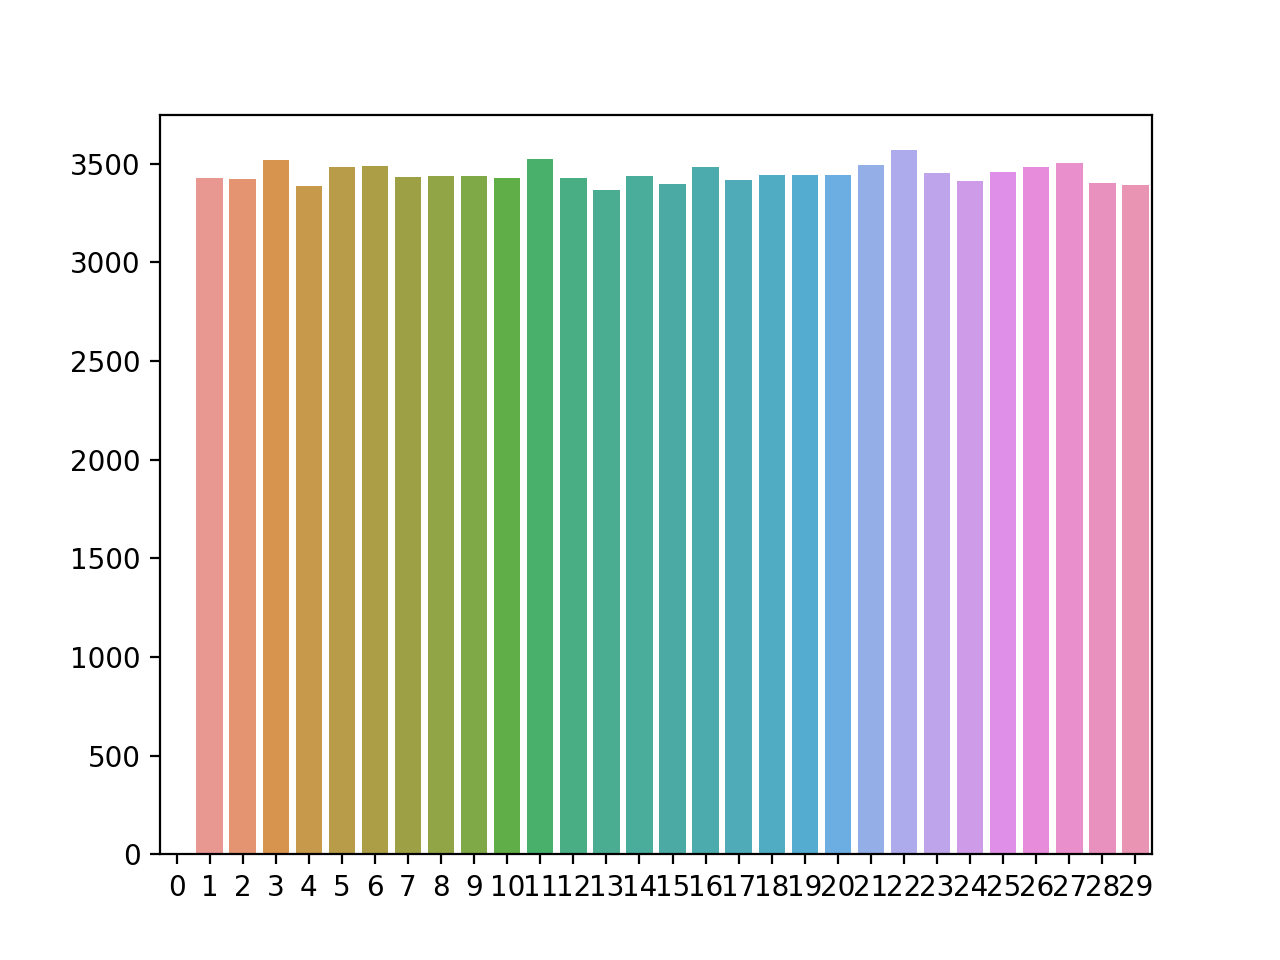

100%|██████████| 100000/100000 [04:09<00:00, 400.66it/s]


In [65]:
N_KIDS = 30
N_SIMS = 100000
UPDATES = False

f, ax = plt.subplots()

hpg = HotPotatoGame()
losses = [0] * N_KIDS
for i in tqdm.trange(N_SIMS):
    loser = hpg.run_simulation()
    losses[loser] += 1
    
    if UPDATES:
        ax.clear()
        sns.barplot(x=list(range(N_KIDS)), y=losses, ax=ax)
        f.canvas.draw()
        
sns.barplot(x=list(range(N_KIDS)), y=losses, ax=ax)

looks pretty constant to me...